# CLIP Interrogator 2.4 by [@pharmapsychotic](https://twitter.com/pharmapsychotic)

Want to figure out what a good prompt might be to create new images like an existing one? The CLIP Interrogator is here to get you answers!

<br>

For Stable Diffusion 1.X choose the **ViT-L** model and for Stable Diffusion 2.0+ choose the **ViT-H** CLIP Model.

This version is specialized for producing nice prompts for use with Stable Diffusion and achieves higher alignment between generated text prompt and source image. You can try out the old [version 1](https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/v1/clip_interrogator.ipynb) to see how different CLIP models ranks terms.

You can also run this on HuggingFace and Replicate<br>
[![Generic badge](https://img.shields.io/badge/🤗-Open%20in%20Spaces-blue.svg)](https://huggingface.co/spaces/pharma/CLIP-Interrogator) [![Replicate](https://replicate.com/pharmapsychotic/clip-interrogator/badge)](https://replicate.com/pharmapsychotic/clip-interrogator)

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [1]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c78d3601-d95f-58a9-1123-34f828ee1451)


In [3]:
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'git-large-coco' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-H-14/laion2b_s32b_b79k' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}

    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.6 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Loading CLIP model ViT-H-14/laion2b_s32b_b79k...


open_clip_model.safetensors:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

ViT-H-14_laion2b_s32b_b79k_artists.safetensors: 100%|██████████| 21.6M/21.6M [00:00<00:00, 240MB/s]
ViT-H-14_laion2b_s32b_b79k_flavors.safetensors: 100%|██████████| 207M/207M [00:00<00:00, 282MB/s]
ViT-H-14_laion2b_s32b_b79k_mediums.safetensors: 100%|██████████| 195k/195k [00:00<00:00, 39.7MB/s]
ViT-H-14_laion2b_s32b_b79k_movements.safetensors: 100%|██████████| 410k/410k [00:00<00:00, 53.2MB/s]
ViT-H-14_laion2b_s32b_b79k_trendings.safetensors: 100%|██████████| 148k/148k [00:00<00:00, 27.4MB/s]
ViT-H-14_laion2b_s32b_b79k_negative.safetensors: 100%|██████████| 84.2k/84.2k [00:00<00:00, 40.5MB/s]

Loaded CLIP model and data in 26.27 seconds.


In [5]:
#@title Image to prompt! 🖼️ -> 📝

def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65039e5a15f8718e8d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


a painting of a chinese cow flying through the clouds., ancient kings in white robes, concert, elevation, carrying a magical staff, chinese painting, dao trong le, well - drawn, baotou china, flying cow


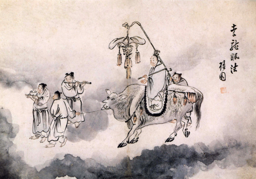

Generating prompts:  64%|██████▍   | 101/158 [1:22:53<40:15, 42.38s/it]

a painting of a group of men sitting on a hill, and a woman sitting on a bench., hyaku. detailed, the potatoes eaters, scientific illustration, korean artist, crouching, martial artist dryad, little detail, document, not cropped, artist unknown, artwork”


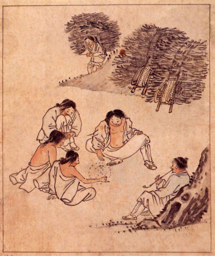

Generating prompts:  65%|██████▍   | 102/158 [1:23:35<39:29, 42.31s/it]

a chinese painting of a man playing a game, medical depiction, korean mmo, musicians playing instruments, real image, 3 heads, aikido, leaked image, illustration detailed, eating, scientific document, illustration”, operation, drawn, encyclopedia illustration, medical drawing, artist interpretation


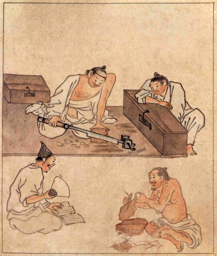

Generating prompts:  65%|██████▌   | 103/158 [1:24:32<43:00, 46.92s/it]

a painting of a group of men cleaning a roof., chinese text, asian old skinny scientist, true life, image, instrument, rpg rulebook illustration, acupuncture treatment, discovered photo, whole page illustration


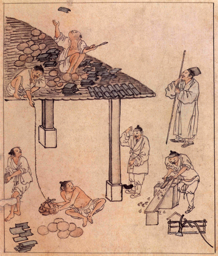

Generating prompts:  66%|██████▌   | 104/158 [1:25:08<39:07, 43.47s/it]

a group of people riding on a donkey., ancient chinese goddess, renaissance drawing, epiphany, biblical painting, image, little detail, normal rockwell, zmonzheng, chinese painting, islamic, 4


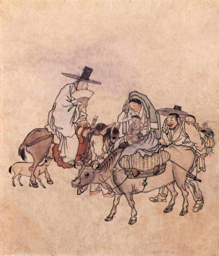

Generating prompts:  66%|██████▋   | 105/158 [1:25:48<37:35, 42.55s/it]

a chinese painting of a group of men working on a stone, toy guillotine, illustration detailed, big hammer, canon on chest, instrument, hong soonsang, frying nails, mechanics, painting illustration, small stature


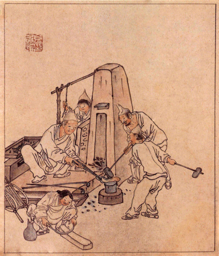

Generating prompts:  67%|██████▋   | 106/158 [1:26:26<35:38, 41.12s/it]

a drawing of a man and woman walking along a wall., hong soonsang, toddler, 1 8 3 0 s style painting, artworks, student, beginner, october, “ painting, detailed picture


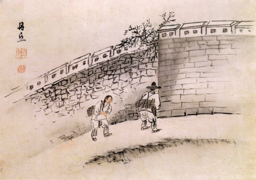

Generating prompts:  68%|██████▊   | 107/158 [1:27:01<33:21, 39.25s/it]

a painting of a chinese landscape, cosmology of kyoto landscape, holy man looking at ground, detail on scene, wraiths riding in the sky, utamaro kitagawa style, red roofs, above side view, childhood, insanly detailed, ancient garden behind her, japanese cartoon style, detail, very detailed picture


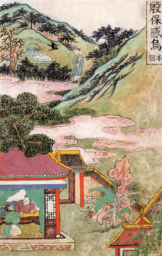

Generating prompts:  68%|██████▊   | 108/158 [1:27:49<34:49, 41.79s/it]

a drawing of a woman weaving a loom., korean mmo, asian man, spinning hands and feet, li zixin, mechanism, fans, triad of muses, netting, whose mind is pure machinery, farming, tastes, exciting illustration, whirling, huke, trampling over pyongyang, great masterpiece


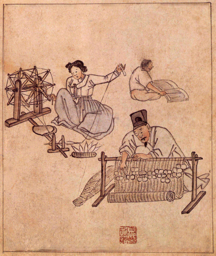

Generating prompts:  69%|██████▉   | 109/158 [1:28:45<37:49, 46.31s/it]

a painting of a group of women sitting on a bench., by Gu Kaizhi, broad detail, family dinner, underground scene, wining, shaded, center view, shaky, panel, hangzhou, school, overload, lute, al fresco, injured


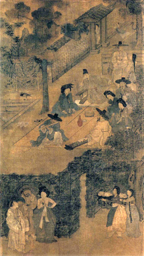

Generating prompts:  70%|██████▉   | 110/158 [1:29:39<38:41, 48.36s/it]

a bird on a branch of a tree, lei jin, sage, large view, ap, wikimedia commons, 1 6 x 1 6, beijing, 王琛, h 1024, ear, image, * * *


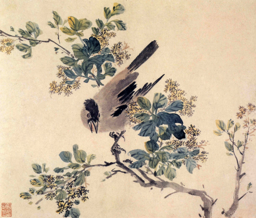

Generating prompts:  70%|███████   | 111/158 [1:30:23<36:52, 47.07s/it]

a drawing of a maze with a number of people in it., fishing boats, by Gu Kaizhi, illustration:.4, farm, tradition, -h 640, skiff, silo, trending on e 6 2 1, little detail, boundary of two lands, beans, al fresco


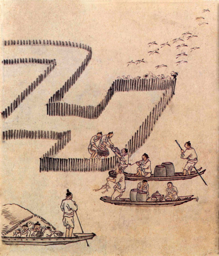

Generating prompts:  71%|███████   | 112/158 [1:31:10<36:06, 47.10s/it]

a drawing of a temple, cat playing lute in the garden, gunwoo kim and j.dickenson, historical photo, comic panel, -640, xianxia hero, printed page, nuttavut baiphowongse, evening sun, 8 1 5, medical depiction, the empress’ hanging, not cropped, celestial gardens, detail on scene


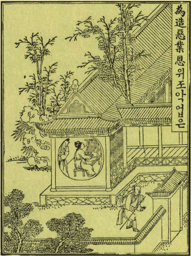

Generating prompts:  72%|███████▏  | 113/158 [1:32:00<36:00, 48.01s/it]

illustration of a japanese garden, tibetan book of the dead, korean writing, fig.1, vietnamese temple scene, comic panel, asleep, historical photo, 中 元 节, advertisment, childhood, not cropped, guangjian, woodcut, closeup - view, cut-scene, composer, pleasant, son, in the evening, musical


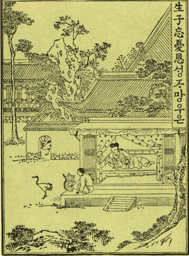

Generating prompts:  72%|███████▏  | 114/158 [1:33:10<40:06, 54.70s/it]

a chinese traditional threading machine, with two women and a child, and a boy, and a woman, working on a loom., ruan jia and arthur rackham, silk flowing in wind, qi sheng luo, leonardo da vinci sketch, gutai group, closeup - view, tang mo, a messy, bun, style of jean baptiste monge


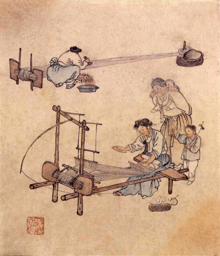

Generating prompts:  73%|███████▎  | 115/158 [1:33:50<35:52, 50.06s/it]

illustration of a woman sleeping in a hut, chinese text, early 1900s newspaper, himeji rivendell garden of eden, comic panel, vietnamese temple scene, - h 8 5 0 - w 6 0 0, window, sake, hangzhou, front side view


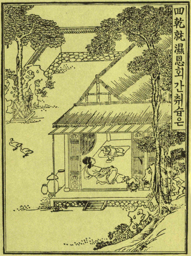

Generating prompts:  73%|███████▎  | 116/158 [1:34:27<32:20, 46.20s/it]

a map of the japanese empire, vietnamese temple scene, comic panel, by Byeon Sang-byeok, small crowd of people, she is walking on a river, cover art, historical image, high resolution image, ufos, sighting, drawn image, doujin, group photo, line art illustration, in a pond, gongbi, pictorial


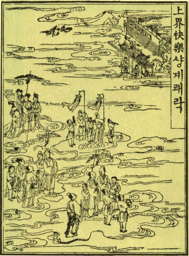

Generating prompts:  74%|███████▍  | 117/158 [1:35:26<34:17, 50.19s/it]

the art of the chinese painting, swinging a big sword, sitting on a curly branch, frightening surroundings, mana in the air, wallpaper - 1 0 2 4, ancient writing, odilon, phone background, 3 2 x 3 2, trending photo, high quality wallpaper


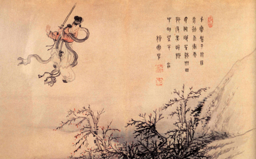

Generating prompts:  75%|███████▍  | 118/158 [1:36:07<31:31, 47.28s/it]

a tree in the forest, [ unused0 ], china, [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], song dynasty, swinging on a vine over a chasm, beautiful wallpaper, ancient writing, above view, winding rivers, pine, tar - like, drawn, special, beautiful image, view


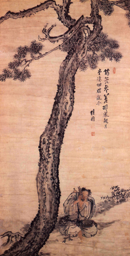

Generating prompts:  75%|███████▌  | 119/158 [1:36:53<30:32, 46.98s/it]

a painting of birds flying over a tree., wuxia, - h 1 0 2 4, bouquet, morning detail, museum item, sickening, sharn


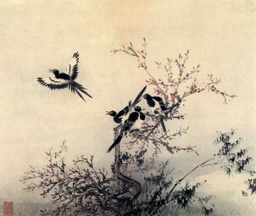

Generating prompts:  76%|███████▌  | 120/158 [1:37:24<26:46, 42.28s/it]

chinese painting - the waterfall by [ unused0 ], camaraderie, beginner, mist, view, sitting down, omg, moutain, transparent, mid view, boys, beautiful lines, singing, fall, peak, teaser, h 1 0 2 4, mid portrait, group portrait, morning glow, chinese painting style, center view


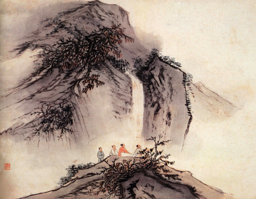

Generating prompts:  77%|███████▋  | 121/158 [1:38:37<31:38, 51.31s/it]

the four horsemen of the apocalypse, [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ],, guanyin, angels protecting a praying man, detailed book illustration, rooted lineage, yellow lanterns, 5 e, orthodox icon, sun wukong, engraved, not cropped, rare, some cosmic angels, lu ji


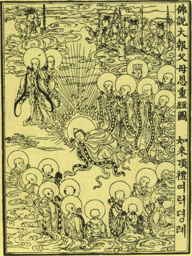

Generating prompts:  77%|███████▋  | 122/158 [1:39:25<30:20, 50.56s/it]

a man and a woman riding a horse under a willow tree, lulu chen, h 640, author unknown, local people chasing to attack, morning detail, walking, philosophy, hziulquoigmnzhah, detailed picture


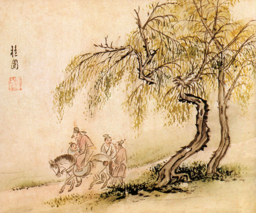

Generating prompts:  78%|███████▊  | 123/158 [1:40:01<26:48, 45.94s/it]

the art of japanese woodblock prints, tarot card the hermit, above side view, ent treant dryad, detailed line art, sea monster, overlaid with chinese text, hziulquoigmnzhah, full-length view, lama, medical depiction, river delta, 2 0 s, wei wang, ad image


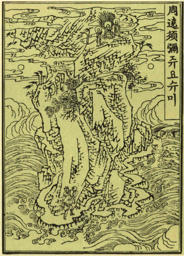

Generating prompts:  78%|███████▊  | 124/158 [1:40:50<26:40, 47.06s/it]

a drawing of a chinese landscape, jumping leaping heroic attack, medieval woodcut, shonen manga panel, discovered photo, [ closeup ]!!, murder scene, very known photo, fake, asian sun, chinese, combat, don quixote left the book, traditional chinese, honor, one


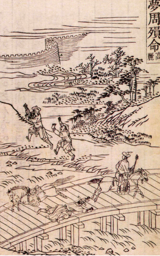

Generating prompts:  79%|███████▉  | 125/158 [1:41:43<26:50, 48.79s/it]

a woman with a book in her hand, katsuhika hokusai, looking at his phone, kintsugi, unknown artist, 3 / 4 view portrait, the hair reaches the ground, portrait”, beautiful asian woman sitting, bogna gawrońska, japan, detailed picture, looking her shoulder, portrait picture


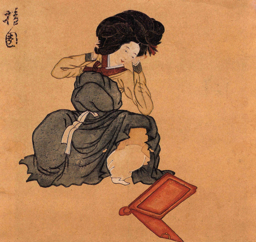

Generating prompts:  80%|███████▉  | 126/158 [1:42:33<26:13, 49.17s/it]

a painting of a group of women in a landscape, 3 winter deities, year 1506, texture detail, gutai group, shade, (snow), concert, super fine detail, artwork”, fan favorite, artist unknown, tastes, pleasing, amber, morning dawn, silk, smoldering


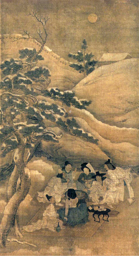

Generating prompts:  80%|████████  | 127/158 [1:43:34<27:13, 52.68s/it]

a drawing of a village in the countryside., chinnese mafia, style of ancient text, cover image, h 7 0 4, random detail, the small house in the forest, reading, sha xi, author unknown, version 3, neighborhood, not cropped, central farm, 8 1 5, golden, common street, woodcut, dao lee, artist sketch, description


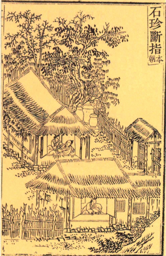

Generating prompts:  81%|████████  | 128/158 [1:44:43<28:44, 57.49s/it]

a drawing of a temple, cover of a magazine, flying dragons, roof with vegetation, comic panel, detail, description, little detail, full image


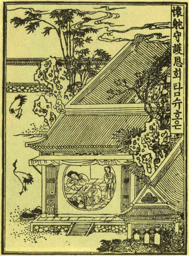

Generating prompts:  82%|████████▏ | 129/158 [1:45:13<23:52, 49.40s/it]

a chinese painting of a temple, a robot reading a book in a park, medieval woodcut, above side view, korean woman, old photo width 768, exterior botanical garden, magazine article, unknown location, teaser, golden sacred tree, 2 0 5 6, exterior view, building cover with plant, 303, gyokugan, detail


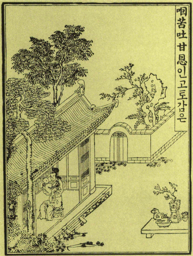

Generating prompts:  82%|████████▏ | 130/158 [1:46:10<24:00, 51.45s/it]

the [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [, persian folklore illustration, by Xuande Emperor, dance meditation, runes in the air, mongolia, balanced masterpiece, group photo, charts, illustration], medium closeup, tree's, traditional chinese art, klee, hurufiyya


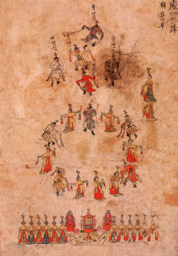

Generating prompts:  83%|████████▎ | 131/158 [1:47:02<23:18, 51.78s/it]

a painting of two men walking with a cane., kanliu666, random content, kwak ji young, masked doctors, image, li zixin, cowboy, 6 4 0, calligraphy, a picture, hyung tae kim, sweeping, carrying a tray, genius, f 2, album art


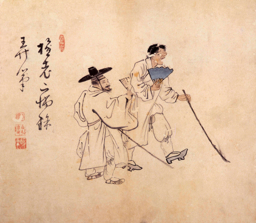

Generating prompts:  84%|████████▎ | 132/158 [1:47:59<23:07, 53.37s/it]

a japanese woodblock print depicting a woman and a man in a room., lying a throne in a fantasy land, traditional korean city, [ closeup ]!!, gardening, detailed line art, chinese text, printed page, chinese building, center view


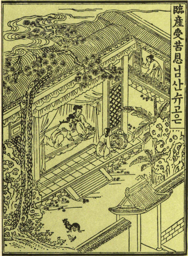

Generating prompts:  84%|████████▍ | 133/158 [1:48:34<19:55, 47.81s/it]

a japanese drawing of a man and woman sitting on a bench., with ancient chinese aesthetic, story book illustration, celestial gardens, above side view, xiaoguang sun, cut-scene, advertisement, author unknown, inside page of comic book, vietnamese temple scene, mulan, not cropped, qiangshu, wei wang, cherry, wonderful scene, flying rituals


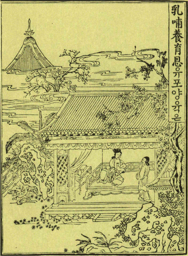

Generating prompts:  85%|████████▍ | 134/158 [1:49:34<20:35, 51.47s/it]

a chinese landscape with a pagoda and a man standing on a hill., inside page of comic book, korean countryside, [ closeup ]!!, artist unknown, quarter view, magazine article, three kingdom, artist sketch, trampling over pyongyang, a woodcut, ancient garden behind her, ruanjia, ruan ji, sichuan


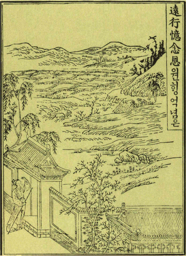

Generating prompts:  85%|████████▌ | 135/158 [1:50:25<19:39, 51.26s/it]

a chinese painting of a branch of a cherry tree, branches and ivy, chinese text, chozo, teaser, composer, autumn, title, half image, 6 4 0, catalog photo, zmonzheng, ear


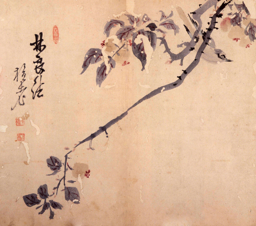

Generating prompts:  86%|████████▌ | 136/158 [1:51:09<17:59, 49.08s/it]

a group of men in a circle around a table., chinese artist, guan yu, trending artstaion, artist sketch, masterpiece w 1024, cute:2, wearing robes and neckties, hand-drawn, showpiece, teacher, chozo, gutai group, detailed picture, handdrawn, tumblr, realism


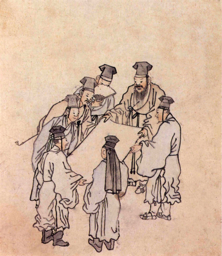

Generating prompts:  87%|████████▋ | 137/158 [1:52:05<17:58, 51.34s/it]

a drawing of a boat with people on it, yiqiang and shurakrgt, high quality artwork, mingei, artwork”, front and side view, medium detail, bottom view, two men, caravagio, semi-transparent, impressive detail, front and back view, modern art, detaild


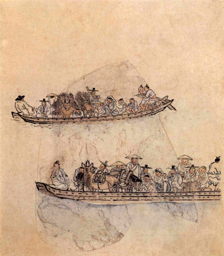

Generating prompts:  87%|████████▋ | 138/158 [1:52:57<17:07, 51.36s/it]

a drawing of a pagoda with a woman sitting on the porch., detail on scene, detailed book illustration, hong soonsang, depicting a flower, lithoraph engraving, yiqiang and shurakrgt, cover page, official illustration, detail, description, bird view, xiaoguang sun, artist unknown, golden sacred tree, part of the screen, willow tree and hill


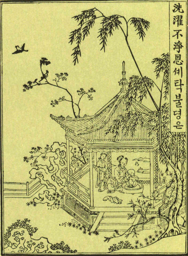

Generating prompts:  88%|████████▊ | 139/158 [1:53:51<16:32, 52.25s/it]

illustration of the [ unused0 ], korean mythology, gunpowder smoke, transformation scene-h 768, ufos, ancien chinese tower, comic panel, book cover, large crowds of peasants, old magazine cover without text, not cropped, old photo width 768, infinite celestial library, zine cover, center view, daopao, blazing fire tornadoes


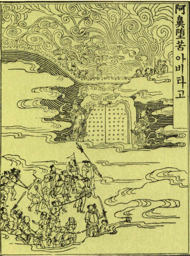

Generating prompts:  89%|████████▊ | 140/158 [1:54:48<16:03, 53.53s/it]

a painting of a man standing under a tree, by Gu Kaizhi, high definition detail, aerial view of an ancient land, masterpiece!, high quality artwork, detailed zoom photo, triumphant, leonardo, weathered drawing, pine, perspicious detail, two men, detailed picture, beautiful wallpaper


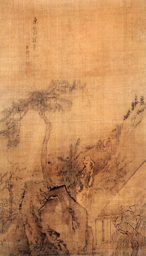

Generating prompts:  89%|████████▉ | 141/158 [1:55:38<14:54, 52.61s/it]

a painting of a tea house, celebrating a king being crowned, tang dynasty, gardening, unknown artist, spring evening, high resolution details, licking, hyaku. detailed, sitting down, pleasing, lute, living, praying, full view, churning, lunar time, screen, enjoyable


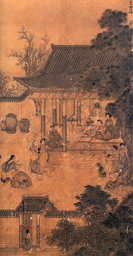

Generating prompts:  90%|████████▉ | 142/158 [1:56:42<14:53, 55.87s/it]

a man riding a camel in the mountains, lin hsiang, young boy, detailed picture, image, okami, child, sha xi, galloping, shanghai, cute:2, joseph todorovitch ”


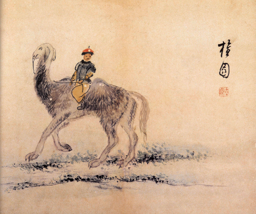

Generating prompts:  91%|█████████ | 143/158 [1:57:23<12:51, 51.43s/it]

a painting of a tree trunk with flowers and leaves, hyaku. detailed, fading to dust and leaves, face of an ox, little detail, wearing ancient chinese clothes, far view, baroque style painting backdrop, author unknown, ; wide shot, reaching, shoulder, wash


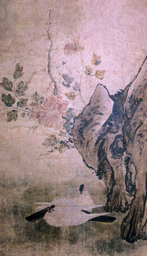

Generating prompts:  91%|█████████ | 144/158 [1:58:06<11:26, 49.07s/it]

the tree of life, [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused, by Qi Baishi, wikimedia commons, damaged vine bridge, with yellow flowers around it, an artistic pose, white blossoms, medium closeup shot, the oak tree, in profile, hziulquoigmnzhah, marin kitagawa


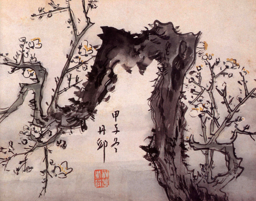

Generating prompts:  92%|█████████▏| 145/158 [1:58:46<10:02, 46.37s/it]

a painting of a group of people, traditional chinese painting, shock, instrument of life, linear illustration, artwork”, pose 1 of 1 6, author unknown, embracing, in the technique of old masters, exciting illustration


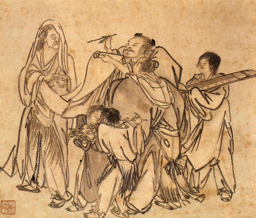

Generating prompts:  92%|█████████▏| 146/158 [1:59:25<08:47, 43.95s/it]

the [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [ unused0 ], [, korean mythology, 16th century painting, crown of (((white lasers))), populace, folk art, tall, ceremonial, mana, hayao miyazki, many heads, godesses, tumblr, detailed annotated painting, standing gracefully upon a lotus


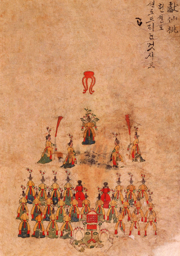

Generating prompts:  93%|█████████▎| 147/158 [2:00:14<08:21, 45.62s/it]

a painting of a group of men riding horses., korean countryside, eating, ruan jia and arthur rackham, road trip, widescreen shot, author unknown, linear illustration, concert, wallpaper - 1 0 2 4, drinking, h 7 0 4, walking


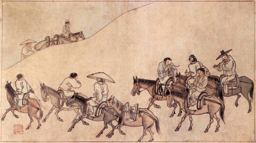

Generating prompts:  94%|█████████▎| 148/158 [2:00:58<07:30, 45.09s/it]

a painting of a landscape with a river and a forest., tea drinking and paper lanterns, h 1 0 8 0, looking at the full moon, above view, farming, description, bo chen, drawn, mono, transparent, sun rising, oni, mid portrait, ori, farm, low


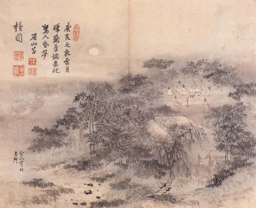

Generating prompts:  94%|█████████▍| 149/158 [2:01:55<07:17, 48.59s/it]

the art of painting artist, flying dragons, crabs, year 1506, black peonies, charcoal smudges, wallpaper”, - h 7 0 4, banner, twins, high quality wallpaper, fishes swimming, graphic”


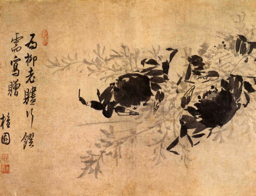

Generating prompts:  95%|█████████▍| 150/158 [2:02:39<06:18, 47.30s/it]

a painting of a group of people riding on a horse., korean countryside, long line-up of suspects, high quality artwork, zmonzheng, manhwa, alessio albi and shin jeongho, medium detail, group of seven, concert, author unknown, semi-transparent, comforting and familiar, hand-drawn, interpretation


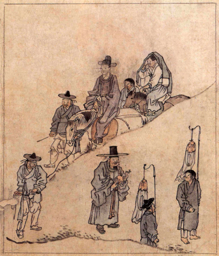

Generating prompts:  96%|█████████▌| 151/158 [2:03:29<05:37, 48.17s/it]

a painting of a forest, by Kikuchi Yōsai, ancient cave, guanyin, above side view, caligrafiturism style, random detail, tumblr, high - intricate - detail, artwork”, kanji, beautiful wallpaper, shaded


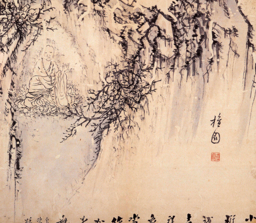

Generating prompts:  96%|█████████▌| 152/158 [2:04:15<04:43, 47.32s/it]

a bird perched on a branch, wuxia, exhibition of paintings, with a pointed chin, full view with focus on subject, 6 4 0, author unknown, genius, mono, a wooden, composer, tar - like, naturalism, philosopher, unknown artist, discovered photo, sake


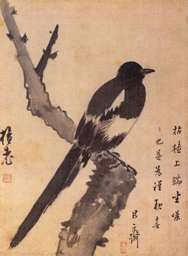

Generating prompts:  97%|█████████▋| 153/158 [2:05:11<04:10, 50.13s/it]

a chinese painting of a man sitting on a bench in front of a house., medieval woodcut, pyongyang, ancient garden behind her, closeup - view, magazine article, historical image, gwanghwamun, man with scythe, above side view, chinese temple, not cropped, [ cosmic, artist sketch, hwang se - on, pictorial


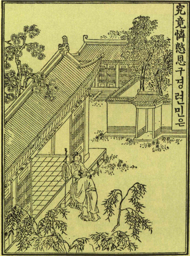

Generating prompts:  97%|█████████▋| 154/158 [2:06:05<03:25, 51.36s/it]

a painting of a bird flying over a hill, 王琛, weathered drawing, 1884, ancient tree, high picture quality, artworks, 1911, image


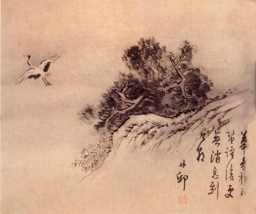

Generating prompts:  98%|█████████▊| 155/158 [2:06:37<02:16, 45.53s/it]

a tiger and a tiger in a forest, chinese men in a prison, trickling water, artist unknown, ancient tree, tsurime eyes, childhood, seen from below, the hair reaches the ground, information, panel, ancient”


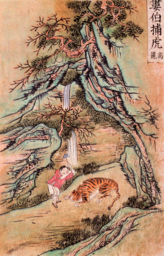

Generating prompts:  99%|█████████▊| 156/158 [2:07:18<01:28, 44.12s/it]

a painting of a horse being repaired by a man., taoism, dissection of funny, shoulder mounted gun, thorough details, author unknown, detailed image, an oldman, year 2134


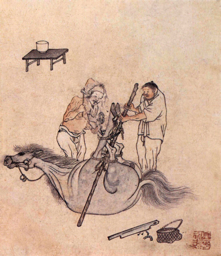

Generating prompts:  99%|█████████▉| 157/158 [2:07:49<00:40, 40.23s/it]

a painting of a village, three kingdoms, simple gable roofs, medium detail, historical image, medical depiction, printed page, closeup - view, high resolution image, medium closeup, thatched roofs, complex shading, beautiful ancient garden behind, intense shading, art masterpiece


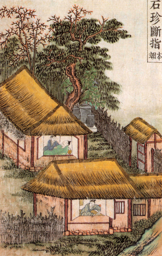

Generating prompts: 100%|██████████| 158/158 [2:08:39<00:00, 48.86s/it]





Generated 158 prompts and saved to /content/drive/MyDrive/2025journal_image_path/kimhongdo/desc.csv, enjoy!


In [6]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/drive/MyDrive/2025journal_image_path/kimhongdo2/" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast","classic","negative"]
output_mode = 'desc.csv' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")


In [8]:
import pandas as pd

# CSV 파일 경로
csv_path = '/content/drive/MyDrive/2025journal_image_path/kimhongdo/prompt.csv'  # ← 파일 경로에 맞게 수정하세요

# CSV 불러오기
df = pd.read_csv(csv_path)

# 2번째 열(열 인덱스 1)의 모든 값 뒤에 ',kimhongdo' 붙이기
df.iloc[:, 1] = df.iloc[:, 1].astype(str) + ', kimhongdo'

# 저장 (덮어쓰기 or 새 파일로 저장)
df.to_csv(csv_path, index=False)

print("✅ 두 번째 열에 ', kimhongdo'가 추가되었습니다!")


✅ 두 번째 열에 ', kimhongdo'가 추가되었습니다!
